In [81]:
#importam llibreries
import numpy as np
import matplotlib.pyplot as plt

FUNCTIONS

In [82]:
def RHS_Vanderpol(t,w,parameters): #eqs Vanderpol
    v = w[1]
    x = w[0]
    f_x = v 
    mu = parameters[0]
    f_v =  mu*(1-x**2)*v - x
    return np.array([f_x,f_v])

In [83]:
def RHS_FHN(t,w,par): #eqs FHN
    y = w[1]
    x = w[0]
    a = par[0]
    eps = par[1]
    f_x = x- x**3/3 - y
    f_y = eps*(x+a) #EN EL RESTO DE FHNs de Maria Rosa está como x+a
    return np.array([f_x,f_y])

In [84]:
def rk(func,parameters, K_pasos, Samp, t_i, w_i):  #funció que fa RK i torna el resultat i els vectors
    h = parameters[-1]
    t = t_i
    w = w_i  
    TR = np.zeros(((len(w)+1), int(np.ceil(K_pasos/Samp))))  #matriu buida amb columnes per a cada vector i el temps i files depenent de la relació entre passes i les que volem guardar

    i = 0  #contador
    
    for j in range(0,K_pasos):
        k1 = h * func(t,w,parameters)                     #RK 2n ordre
        k2 = h * func(t + h/2, w + k1/2,parameters)
        
        t = t + h
        w = w + k2 

        if j % Samp == 0:   #if the remainder is 0, guardam els vectors a la seva columna
            TR[0,i] = t  
            TR[1,i] = w[0]
            TR[2,i] = w[1]
            i += 1
    return TR , w , t #torna la matriu i els vectors

Parameters and initial conditions

In [85]:
A = np.linspace(0.9955, 1.0015, 15)
eps = 0.01 #epsilon
h = 0.01   #pas 

K_pasos1 = int(5e5)   
Samp = 10 #cada quant volem guardar
t_i = 0 #temps inicial

#valors inicials (put ic 1,0.6 closet to SS for a=1)
x_i = 2
y_i = 0 

#good for xxxx valors inicials (put ic 1,0.6 closet to SS for a=1)
#x_i = 1 
#y_i = 0.6 


w_i = np.array([x_i,y_i]) #vector amb els valors inicials

Save = np.zeros((len(A),(len(w_i)+1), int(np.ceil(K_pasos1/Samp)))) #matriu buida per guardar els vectors


    

Runge-Kutta second order

In [86]:
#bucle per a que faci el càlcul per a cada a
b=0
for a in A:
    parameters = np.array([a , eps, h])  #vector amb els paràmetres a, epsilon i h
    [TR , w_1, t_1] = rk(RHS_FHN, parameters, K_pasos1 , Samp, t_i ,w_i)    #matriu i vector resultants dels valors inicials
    [TR , w_f, t_f] = rk(RHS_FHN, parameters, K_pasos1 , Samp, t_i ,w_1)
    Save[b,:,:] = TR
    b += 1

PLOTTING

In [87]:
%matplotlib widget

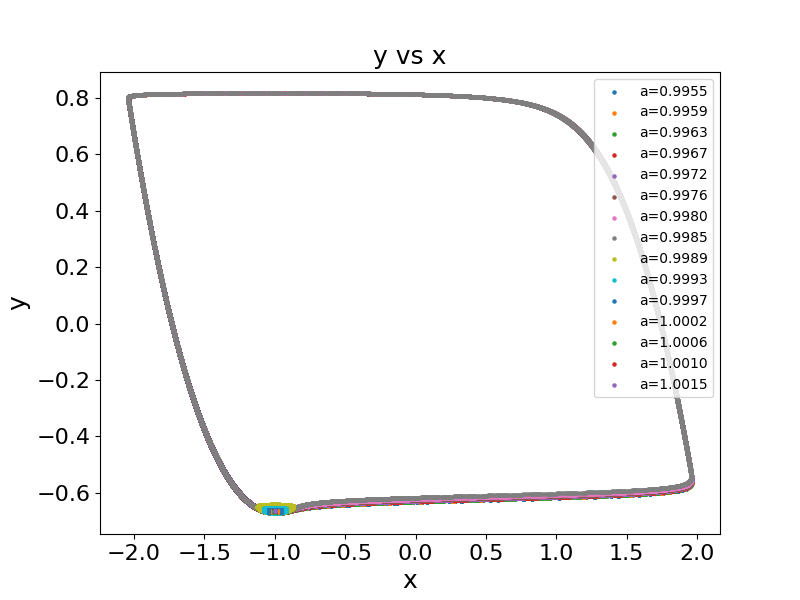

In [88]:

fig, ax = plt.subplots(figsize=(8,6))
c= 0
for a in A:
    ax.scatter(Save[c,1,:], Save[c,2,:], s = 5, label = 'a=' + str(a)[:6])
    ax.grid(False)
    ax.set_ylabel('y', fontsize=18)
    ax.set_xlabel('x',fontsize=18)
    ax.set_title('y vs x',fontsize=18)
    ax.legend(loc='upper right')
    ax.tick_params(axis='y', labelsize=16)  
    ax.tick_params(axis='x', labelsize=16)  
    c = c + 1
plt.show()